In [2]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import color
from skimage import morphology
from skimage import segmentation
from skimage import util
from skimage import transform

## !! FIND A WAY TO IMPORT PHOTOS EASIER !!

In [2]:
#Load image
image = io.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer/BCC/PAT_875_1668_588.png')
image.shape

(904, 905, 4)

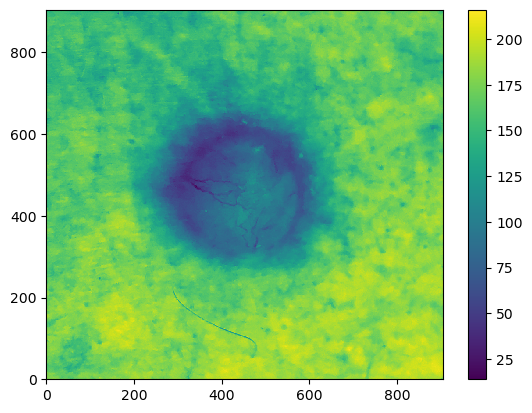

In [4]:
plt.pcolormesh(image[:,:,1])
plt.colorbar()

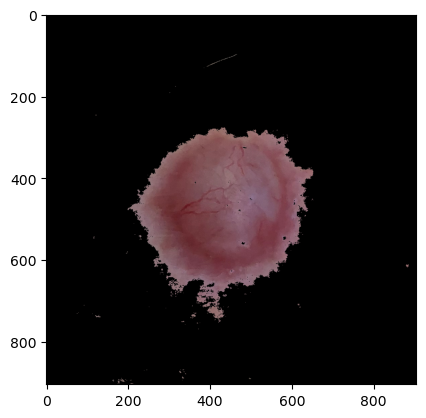

In [5]:
# Remove the alpha channel
if image.shape[-1] == 4:
    image = image[..., :3]

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Create a binary mask
mask = image_gray < 0.5

# Apply the mask to the image
image_masked = image.copy()
image_masked[~mask] = 0

# Display the masked image
plt.imshow(image_masked)
plt.show()

## !!! NEEDS TO BE FIXED !!!

idk whats wrong with it :((

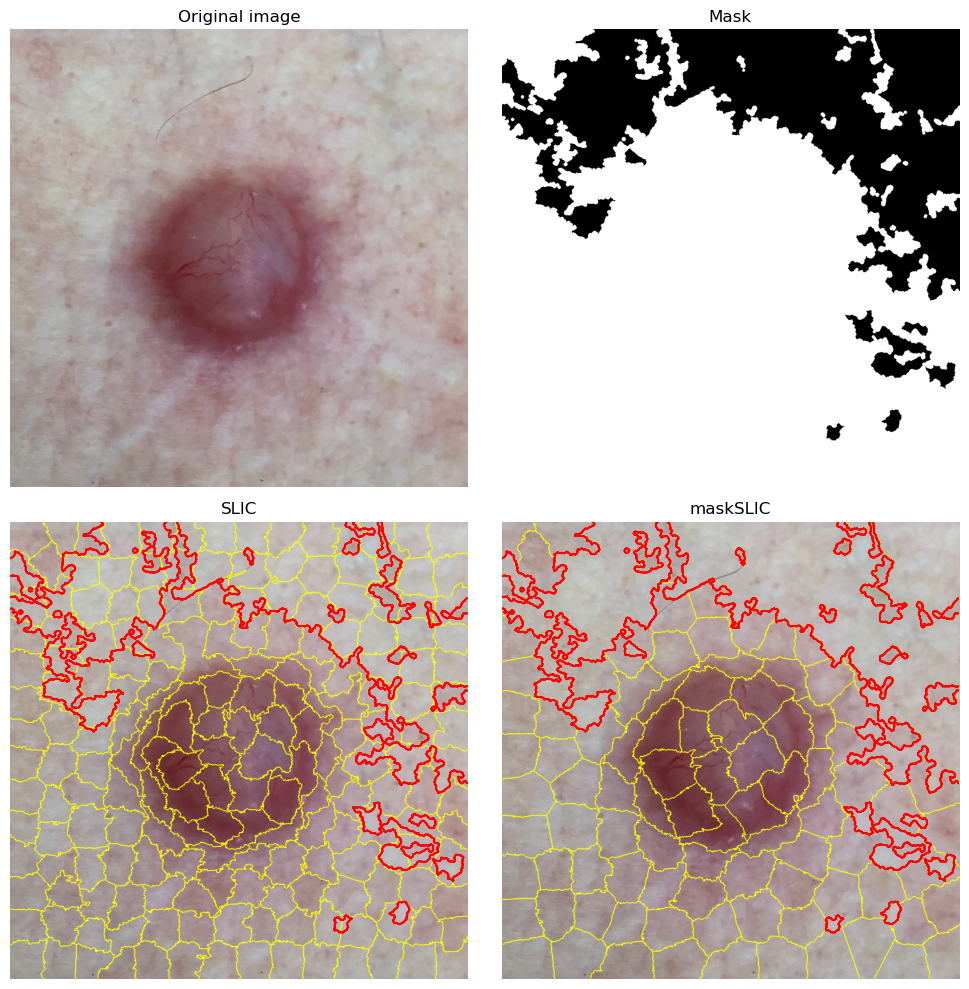

In [6]:
# Input data
if image.shape[-1] == 4:
    image = image[..., :3]

# Compute a mask
lum = color.rgb2gray(image)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.7, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(image, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(image, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(image)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(image, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(image, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

#### Image resizing testing

In [6]:
# Define the target size
target_size = (256, 256)

# Set the path to the folder containing the images
folder_path = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/Validation'

folder_path_out = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/Validation_res'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Loop over the image file names and resize each image
for filename in image_files:
    # Load the image from file
    image = io.imread(os.path.join(folder_path, filename))
    
    # Resize the image to the target size
    resized_image = transform.resize(image, target_size)
    
    # Save the resized image to file
    io.imsave(os.path.join(folder_path_out, 'resized_' + filename), resized_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [5]:
folder_path_masked = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer/BCC_res'

image_files = [f for f in os.listdir(folder_path_masked) if f.endswith('.png')]

for filename in image_files:
    # Load the image from file
    image = io.imread(os.path.join(folder_path_masked, filename))
    
    # Remove the alpha channel
    if image.shape[-1] == 4:
        image = image[..., :3]

    # Convert the image to grayscale
    image_gray = color.rgb2gray(image)

    # Create a binary mask
    mask = image_gray < 0.5

    # Apply the mask to the image
    image_masked = image.copy()
    image_masked[~mask] = 0
    
    # Save the resized image to file
    io.imsave(os.path.join(folder_path_masked, 'masked_' + filename), image_masked)